In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stat
from IPython.display import Image


In [2]:
def loireproduction(p,n):
  u=np.random.uniform(0,1,n)
  K=len(p)
  a=np.zeros(n)
  for i in range(1,K):
    #a.append(i*(u < np.cumsum(p)[i])*(u > np.cumsum(p)[i-1]))
    a=a +i*(u < np.cumsum(p)[i])*(u > np.cumsum(p)[i-1])
  return a



In [3]:
piw=np.arange(0,1,0.01)
loireproduction(piw,10)

array([ 3.,  9., 13.,  2., 12.,  8., 10., 13.,  6., 13.])

In [4]:
def GW(p,z0,N):
  Z=np.zeros(N+1)
  Z[0]=z0
  i=0
  while i <N and Z[i]>0:
    Z[i+1]=np.sum(loireproduction(p,int(Z[i])))
    i=i+1
  return Z

In [5]:
p=[1/5,7/10,1/10]
a=[]
for i in np.arange(3):
  a.append(i*p[i])
m=np.sum(a)
m #donc zn ne s'étaint pas 

0.8999999999999999

In [6]:
loireproduction(p,10)

array([1., 0., 1., 1., 1., 2., 0., 1., 1., 0.])

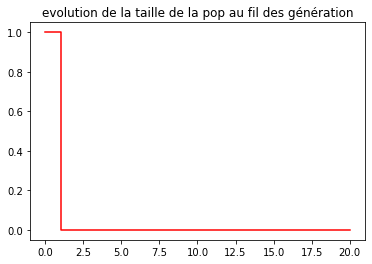

In [8]:
N=20
Z=GW(p,1,N)
plt.step(np.arange(N+1),Z,color="red")
plt.title("evolution de la taille de la pop au fil des génération");

In [9]:
K=100
N=100
extinction=np.zeros(K)
for i in range(K):
  Z=GW(p,1,N)
  if Z[N] == 0:
    extinction[i]=1
q=np.mean(extinction)
q

1.0

In [10]:
temps=np.zeros(K)
for i in range(K):
  Z=np.zeros(N+1)
  Z[0]=1
  T=0
  while Z[T]>0 and T<N : 
    Z[T+1]=np.sum(loireproduction(p,int(Z[T])))
    T=T+1
  temps[i] =T
np.mean(temps)

6.95

In [11]:
p1=[0.1,0.7,0.2]
aa=[]
for i in np.arange(3):
  aa.append(i*p1[i])
m1=np.sum(aa)
m1 #donc zn s'étaint avec une probabilité q<1 

1.1

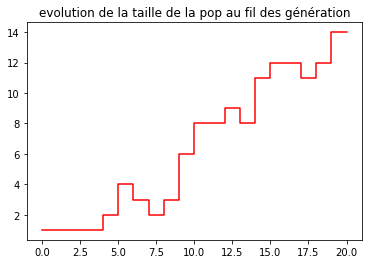

In [12]:
N=20
Z=GW(p1,1,N)
plt.step(np.arange(N+1),Z,color="red")
plt.title("evolution de la taille de la pop au fil des génération");

In [13]:
K=100
N=100
extinction=np.zeros(K)
for i in range(K):
  Z=GW(p1,1,N)
  if Z[N] == 0:
    extinction[i]=1
q=np.mean(extinction)
q

0.52

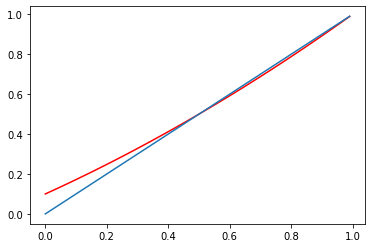

In [14]:
def g(s):
  return 0.1 + 0.7*s +  0.2*s**2

plt.plot(piw,g(piw),color="red")
plt.plot(piw,piw);
#q c'est le point d'intersection 

#Chines de markov modèle de WF


In [15]:
def wroghtfisher(x0,N,T):
  X=np.zeros(T+1)
  X[0]=x0
  i=0
  for i in range(T):
    X[i+1]=stat.binom.rvs(N,X[i]/N,loc=0,size=1)
    
  return X

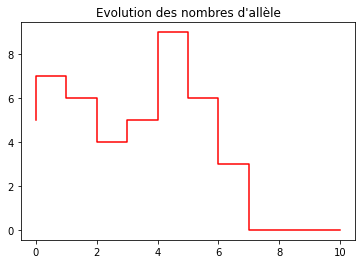

In [16]:
N=100
T=10
Z=wroghtfisher(5,N,10)
plt.step(np.arange(T+1),Z,color="red")
plt.title("Evolution des nombres d'allèle");

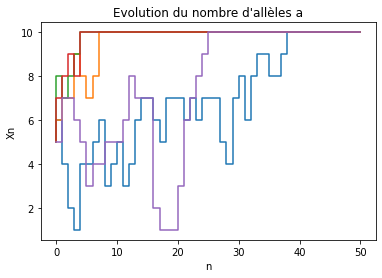

In [18]:
N=10
K=5
x0=5
T=50
for i in range(K):
  X=wroghtfisher(x0,N,T)
  plt.step(np.arange(T+1),X)
  plt.title("Evolution du nombre d'allèles a")
  plt.xlabel('n')
  plt.ylabel("Xn")


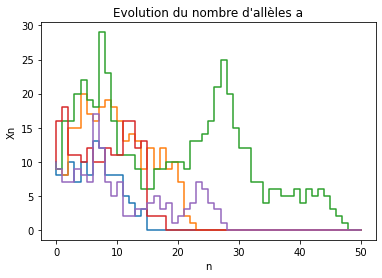

In [24]:
N=100
K=5
x0=10
T=50
for i in range(K):
  X=wroghtfisher(x0,N,T)
  plt.step(np.arange(T+1),X)
  plt.title("Evolution du nombre d'allèles a")
  plt.xlabel('n')
  plt.ylabel("Xn")

Probabilité d'extinction

In [28]:
N=10
K=100
x0=8
T=50
extinction=np.zeros(K+1)
for i in range(K):
  X=wroghtfisher(x0,N,T)
  if X[T] == 0:
    extinction[i]=1
pext=np.mean(extinction)
pext

0.2079207920792079

In [29]:
N=100
K=100
x0=20
T=100
extinction=np.zeros(K+1)
for i in range(K):
  X=wroghtfisher(x0,N,T)
  if X[T] == 0:
    extinction[i]=1
pext=np.mean(extinction)
pext

0.594059405940594

Temps de fixation

In [31]:
N=10
K=100
x0=5
T=500
time_fixe=np.zeros(K+1)
for i in range(K):
  X=np.zeros(T+1)
  X[0]=x0
  time=0
  while X[time]>0 and X[time]<N and time<T:
    X[time+1]=stat.binom.rvs(N,X[time]/N,0,1)
    time=time +1
  time_fixe[i]=time
tfix=np.mean(time_fixe)
tfix

13.910891089108912

In [32]:
N=100
K=100
x0=8
T=200
time_fixe=np.zeros(K+1)
for i in range(K):
  X=np.zeros(T+1)
  X[0]=x0
  time=0
  while X[time]>0 and X[time]<N and time<T:
    X[time+1]=stat.binom.rvs(N,X[time]/N,0,1)
    time=time +1
  time_fixe[i]=time
tfix=np.mean(time_fixe)
tfix

44.0990099009901

In [37]:
def MSTOCH():
    
    P=np.zeros([6,6])
    P[0,3]=4
    P[1,0]=2
    P[2,1]=5
    P[3,1]=3
    P[3,4]=2
    P[4,1]=1
    P[4,2]=0.9
    P[4,5]=3
    P[5,2]=2
    
    sumLine=np.sum(P,axis=1)
    P/=sumLine[:,np.newaxis]
    
    return P

In [38]:
MSTOCH()

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.6       , 0.        , 0.        , 0.4       ,
        0.        ],
       [0.        , 0.20408163, 0.18367347, 0.        , 0.        ,
        0.6122449 ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]])

Simulation

In [43]:
def CM(t,P,x0):
  X=np.zeros(t,dtype=np.int)
  X[0]=x0
  for t in range(t-1):
    X[t+1]=np.random.choice(a=range(len(P)),p=P[X[t],:])
  return X

<ipython-input-43-898a702398b3>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X=np.zeros(t,dtype=np.int)


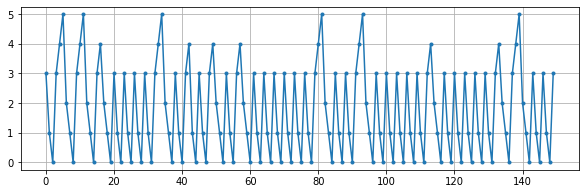

In [47]:
t_max=150
P=MSTOCH()
X=CM(t_max,P,3)
plt.figure(figsize=(10,3))
plt.plot(range(t_max),X, '.-')
plt.grid();

Marches aléatoires

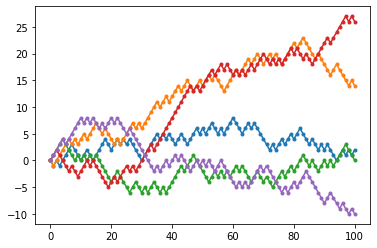

In [49]:
#Marche aléatoire simple
def marchesp(t,x0=0):
  S=np.random.choice(a=[-1,1],size=t)
  return np.concatenate([[x0],x0 + np.cumsum(S)],axis=0)

for d in range(5):
  plt.plot(marchesp(100),'.-')

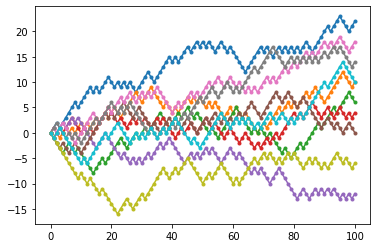

In [52]:
#marhce non simple
def marchenonsp(t,x0=0):
  S=np.random.choice(a=[-1,0,1],size=t)
  return np.concatenate([[x0],x0 + np.cumsum(S)],axis=0)

for d in range(10):
  plt.plot(marchesp(100),'.-')

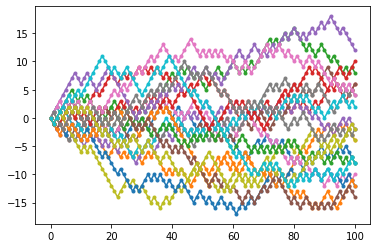

In [57]:
for d in range(20):
  plt.plot(marchesp(100),'.-')

In [63]:
#marche simple absorbe
def marchesimplabsorbee(n,t,x0=None):
  if x0 is None : x0=n//2

  P=np.zeros([n,n])
  for i in np.arange(1,n-1):
    P[i,i+1]=0.5
    P[i,i-1]=0.5
  P[0,0]=1
  P[-1,-1]=1

  return CM(t,P,x0)

<ipython-input-43-898a702398b3>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X=np.zeros(t,dtype=np.int)
<ipython-input-43-898a702398b3>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more deta

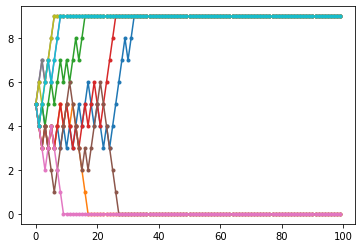

In [66]:
for i in range(10):
  plt.plot(marchesimplabsorbee(10,100),'.-')
plt.show()